In [1]:
import numpy as np
from scipy.stats import norm
import numpy as np
import astropy
from astropy.io import fits
from astropy import units as u
from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import healpy as hp
import pandas as pd
import math
import scipy
import statistics as st
from scipy import stats
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from IPython.display import Image

%matplotlib inline

NSIDE=2048
Npix=12*NSIDE**2

pi=math.pi

import warnings
warnings.filterwarnings('ignore')

---

### Read in AMF dr9

In [2]:
dr9 = pd.read_csv('86objects.csv')
dr9['amf_glat'] = np.around(dr9['amf_glat'].values,1)
dr9['amf_glon'] = np.around(dr9['amf_glon'].values,1)
print(dr9.iloc[0,15]) # glat
print(dr9.iloc[0,16]) # glon

48.3
171.6


In [3]:
# hp.mollview(mask,norm='hist',coord=['G'],title='Masked S/N map')
# hp.visufunc.projscatter(dr9['amf_glon'],dr9['amf_glat'],c='b',lonlat=True,s=10)

### Check against intersection mask

In [4]:
mask = hp.read_map('HFI_PCCS_SZ-selfunc-inter-cosmo_2.02.fits')

# Get the nside and number of pixels in your map
nside = hp.get_nside(mask)
npix = hp.nside2npix(nside)
maskedPixels, = np.where(mask == 0)

# Use pix2ang to get the (l, b) coordinates for each pixel
glons, glats = hp.pix2ang(nside, maskedPixels, lonlat=True)
maskedArray = pd.DataFrame({'glon': np.around(glons,1), 'glat': np.around(glats,1)})
maskedArray = maskedArray[(maskedArray.glat > 12)|((maskedArray.glat<-12) & (maskedArray.glon<180))].reset_index()

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [5]:
interLons = []
interLats = []

for i in range(dr9.shape[0]):
    matchFlag=False
    for j in range(11): # Within 1 degree
        print(i,dr9.iloc[i][16],dr9.iloc[i][15])
        if not maskedArray.loc[np.logical_and(maskedArray.glon == dr9.iloc[i][16]+j/10, maskedArray.glat == dr9.iloc[i][15]+j/10)].empty:
            print("MATCH")
            matchFlag=True
            interLons.append(dr9.iloc[i][16])
            interLats.append(dr9.iloc[i][15])
            break
    if not matchFlag:
        for j in range(11): # Within 1 degree
            print(i,dr9.iloc[i][16],dr9.iloc[i][15])
            if not maskedArray.loc[np.logical_and(maskedArray.glon == dr9.iloc[i][16]-j/10, maskedArray.glat == dr9.iloc[i][15]-j/10)].empty:
                print("MATCH")
                matchFlag=True
                interLons.append(dr9.iloc[i][16])
                interLats.append(dr9.iloc[i][15])
                break
masked = pd.DataFrame({'glon': interLons, 'glat': interLats})

0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
3 328.4 57.4
3 328.4 57.4
3 328.4 57.4
3 328.4 57.4
3 328.4 57.4
3 328.4 57.4
3 328.4 57.4
3 328.4 57.4
3 328.4 57.4
3 328.4 57.4
3 328.4 57.4

35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
38 8.9 44.7
38 8.9 44.7
38 8.9 44.7
38 8.9 44.7
38 8.9 44.7
38 8.9 44.7
38 8.9 44.7
38 8.9 44.7
38 8.9 44.7
38 8.9 44.7
38 8.9 44.7


73 187.9 -40.5
73 187.9 -40.5
73 187.9 -40.5
73 187.9 -40.5
73 187.9 -40.5
73 187.9 -40.5
73 187.9 -40.5
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
75 35.5 29.1
MATCH
76 110.1 -41.3
MATCH
77 58.0 -26.7
MATCH
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 

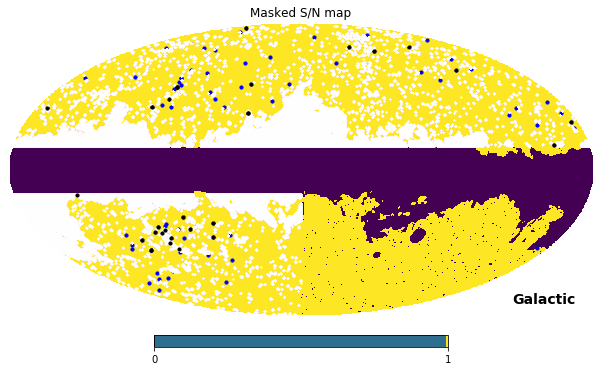

In [6]:
hp.mollview(mask,norm='hist',coord=['G'],title='Masked S/N map')
hp.visufunc.projscatter(dr9['amf_glon'],dr9['amf_glat'],c='b',lonlat=True,s=10)
hp.visufunc.projscatter(maskedArray.glon,maskedArray.glat,c='w',lonlat=True,s=0.1)
hp.visufunc.projscatter(interLons, interLats,c='k',lonlat=True,s=10)

### Check against union mask

In [7]:
mask = hp.read_map('HFI_PCCS_SZ-selfunc-union-survey_2.02.fits')

# Get the nside and number of pixels in your map
nside = hp.get_nside(mask)
npix = hp.nside2npix(nside)
maskedPixels, = np.where(mask == 0)

# Use pix2ang to get the (l, b) coordinates for each pixel
glons, glats = hp.pix2ang(nside, maskedPixels, lonlat=True)
maskedArray = pd.DataFrame({'glon': np.around(glons,1), 'glat': np.around(glats,1)})
maskedArray = maskedArray[(maskedArray.glat > 15)|(maskedArray.glat<-15)].reset_index()

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [8]:
# Get the nside and number of pixels in your map
nside = hp.get_nside(mask)
npix = hp.nside2npix(nside)
maskedPixels, = np.where(mask == 0)

# Use pix2ang to get the (l, b) coordinates for each pixel
glons, glats = hp.pix2ang(nside, maskedPixels, lonlat=True)
maskedArray = pd.DataFrame({'glon': np.around(glons,1), 'glat': np.around(glats,1)})
maskedArray = maskedArray[(maskedArray.glat > 12)|((maskedArray.glat<-12) & (maskedArray.glon<180))].reset_index()

In [9]:
unionLons = []
unionLats = []

for i in range(dr9.shape[0]):
    matchFlag=False
    for j in range(11): # Within 1 degree
        print(i,dr9.iloc[i][16],dr9.iloc[i][15])
        if not maskedArray.loc[np.logical_and(maskedArray.glon == dr9.iloc[i][16]+j/10, maskedArray.glat == dr9.iloc[i][15]+j/10)].empty:
            print("MATCH")
            matchFlag=True
            unionLons.append(dr9.iloc[i][16])
            unionLats.append(dr9.iloc[i][15])
            break
    if not matchFlag:
        for j in range(11): # Within 1 degree
            print(i,dr9.iloc[i][16],dr9.iloc[i][15])
            if not maskedArray.loc[np.logical_and(maskedArray.glon == dr9.iloc[i][16]-j/10, maskedArray.glat == dr9.iloc[i][15]-j/10)].empty:
                print("MATCH")
                matchFlag=True
                unionLons.append(dr9.iloc[i][16])
                unionLats.append(dr9.iloc[i][15])
                break
masked = pd.DataFrame({'glon': unionLons, 'glat': unionLats})

0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
0 171.6 48.3
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
1 221.9 27.8
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
2 53.5 -46.9
3 328.4 57.4
3 328.4 57.4
3 328.4 57.4
3 328.4 57.4
3 328.4 57.4
3 328.4 57.4
3 328.4 57.4
3 328.4 57.4
3 328.4 57.4
3 328.4 57.4
3 328.4 57.4

34 125.0 -54.6
34 125.0 -54.6
34 125.0 -54.6
34 125.0 -54.6
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
35 260.9 51.4
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
36 109.5 -53.8
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
37 30.4 61.1
38 8.9 44.7
38 8

74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
74 149.9 66.8
75 35.5 29.1
MATCH
76 110.1 -41.3
MATCH
77 58.0 -26.7
MATCH
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
78 90.9 44.1
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
79 207.6 22.5
80 95.3 48.2
80 95.3 48.2
80 95.3 48.2
80 95.3 48.2
80 95.3 48.2
80 95.3 48.2
80

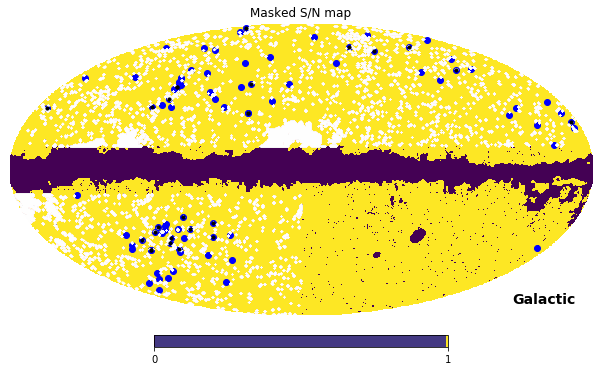

In [10]:
hp.mollview(mask,norm='hist',coord=['G'],title='Masked S/N map')
hp.visufunc.projscatter(dr9['amf_glon'],dr9['amf_glat'],c='b',lonlat=True)
hp.visufunc.projscatter(maskedArray.glon,maskedArray.glat,c='w',lonlat=True,s=0.1)
hp.visufunc.projscatter(unionLons, unionLats,c='k',lonlat=True,s=10)

In [11]:
len(interLons)

30

In [12]:
len(unionLons)

26